In [1]:
#Use discretization to :
# To handle Outliers
# To improve the value spread

In [2]:
#Types of Discretization
#Unsupervise-#1.Equal Width(uniform)
             #2.Equal Frequency(quantile)
             #3.K-means Binning
#Supervised- Decision-Tree binning
#Custom Binning

In [3]:
#Equal Width = max-min / bins
#Equal frequency = Each interval contains 10% of total obs
#Kmeans Binning = Finding centroid of a single point from all centroids


In [4]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer


In [6]:
df = pd.read_csv('titanic_train.csv',usecols = ['Age','Fare','Survived'])

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(714, 3)

In [9]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [12]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [13]:
clf = DecisionTreeClassifier()


In [14]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [15]:
accuracy_score(y_test,y_pred)

0.6293706293706294

In [16]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6358959311424099

In [17]:
kbin_age = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [18]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [19]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [20]:
trf.named_transformers_['first']

KBinsDiscretizer(encode='ordinal', n_bins=10)

In [21]:
trf.named_transformers_['first'].n_bins_

array([10])

In [22]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.5 , 32.  , 36.  , 42.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

In [23]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.75  ,   7.8958,   9.225 ,  13.    ,  15.75  ,
               26.    ,  29.125 ,  51.4792,  82.1708, 512.3292])         ],
      dtype=object)

In [24]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [25]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())
  
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
706,45.00,8.0,13.5000,4.0,"(42.0, 50.0]","(13.0, 15.75]"
546,19.00,2.0,26.0000,6.0,"(14.0, 19.0]","(15.75, 26.0]"
305,0.92,0.0,151.5500,9.0,"(0.42, 14.0]","(82.171, 512.329]"
779,43.00,8.0,211.3375,9.0,"(42.0, 50.0]","(82.171, 512.329]"
297,2.00,0.0,151.5500,9.0,"(0.42, 14.0]","(82.171, 512.329]"


In [26]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [27]:
accuracy_score(y_test,y_pred2)

0.6223776223776224

In [28]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6345070422535211

In [29]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    

C:\Users\Vipul\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\Vipul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Vipul\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\Vipul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMean

0.6317097026604068


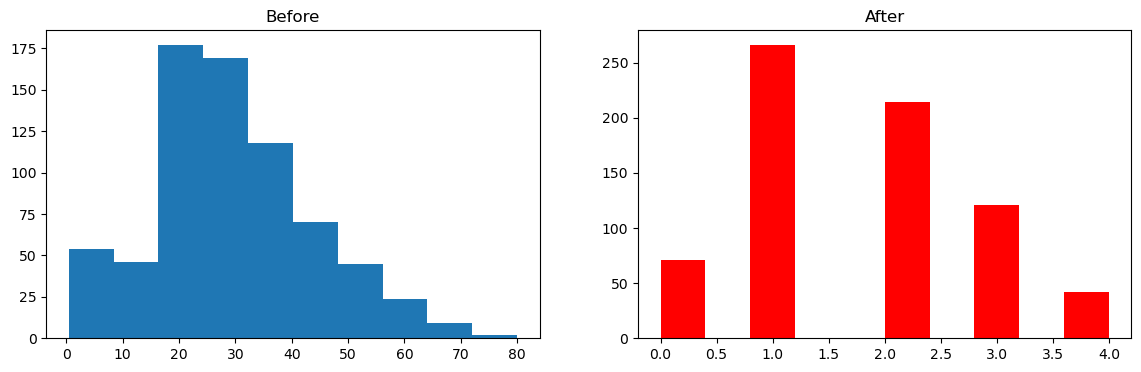

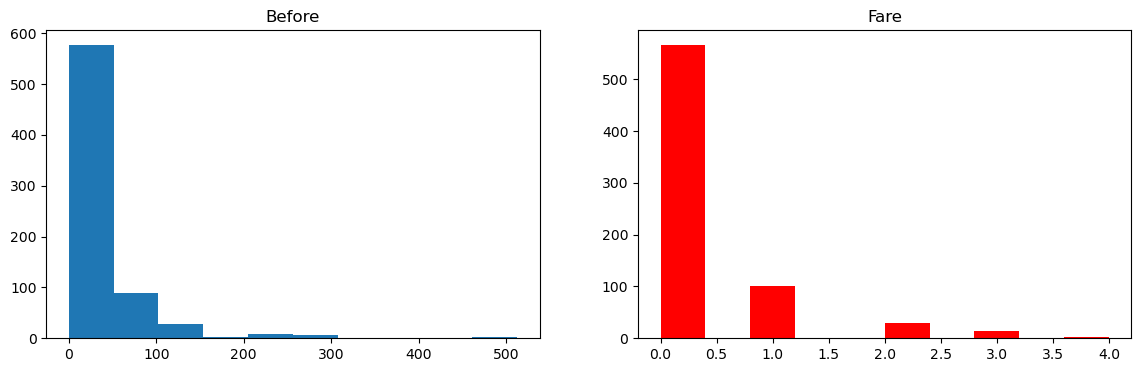

In [30]:
discretize(5,'kmeans')

C:\Users\Vipul\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\Vipul\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


0.6331377151799688


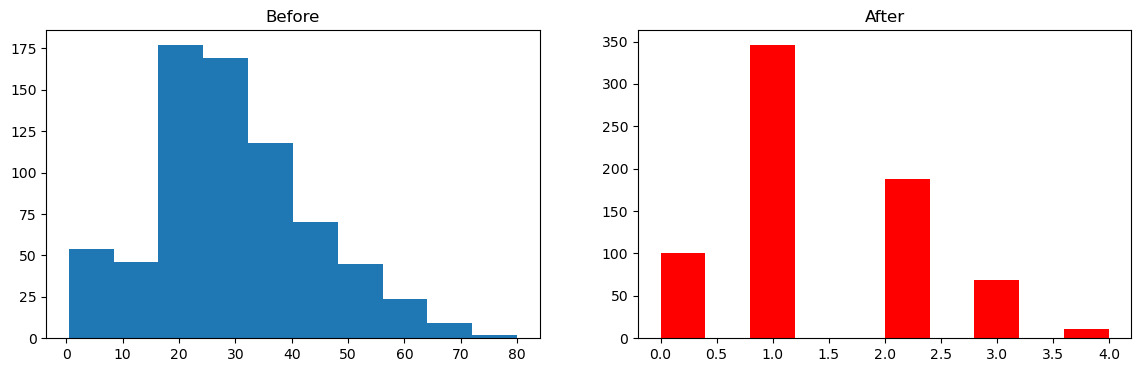

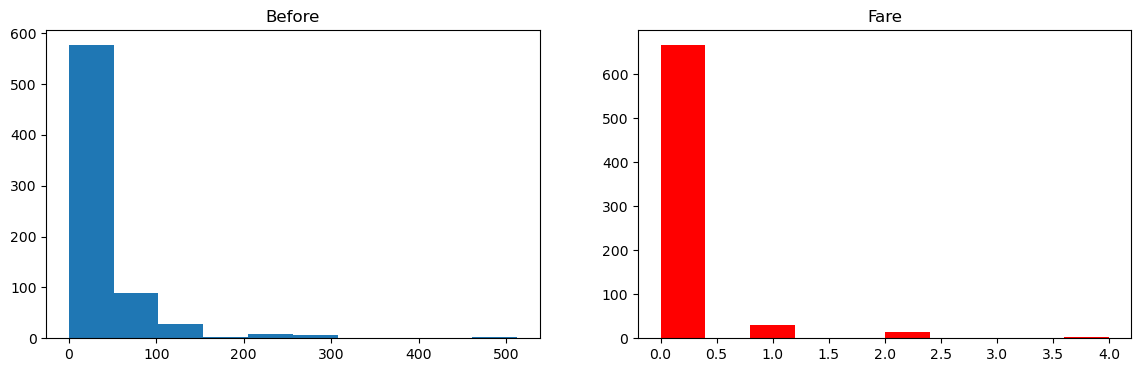

In [31]:
discretize(5,'uniform')

# Binarization

In [32]:
import numpy as np
import pandas as pd

In [33]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.compose import ColumnTransformer

In [34]:
df = pd.read_csv('titanic_train.csv')[['Age','Fare','SibSp','Parch','Survived']]

In [35]:
df.dropna(inplace=True)

In [36]:
df.head()

,Age,Fare,SibSp,Parch,Survived
0,22.0,7.2500,1,0,0
1,38.0,71.2833,1,0,1
2,26.0,7.9250,0,0,1
3,35.0,53.1000,1,0,1
4,35.0,8.0500,0,0,0


In [37]:
df['family'] = df['SibSp'] + df['Parch']

In [38]:
df.head()

,Age,Fare,SibSp,Parch,Survived,family
0,22.0,7.2500,1,0,0,1
1,38.0,71.2833,1,0,1,1
2,26.0,7.9250,0,0,1,0
3,35.0,53.1000,1,0,1,1
4,35.0,8.0500,0,0,0,0


In [39]:
df.drop(columns=['SibSp','Parch'],inplace=True)

In [40]:
df.head()

,Age,Fare,Survived,family
0,22.0,7.2500,0,1
1,38.0,71.2833,1,1
2,26.0,7.9250,1,0
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [41]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
X_train.head()

,Age,Fare,family
328,31.0,20.5250,2
73,26.0,14.4542,1
253,30.0,16.1000,1
719,33.0,7.7750,0
666,25.0,13.0000,0


In [44]:
# Without binarization

clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.6293706293706294

In [45]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6456964006259781

In [46]:
# Applying Binarization

from sklearn.preprocessing import Binarizer

In [47]:
trf = ColumnTransformer([
    ('bin',Binarizer(copy=False),['family'])
],remainder='passthrough')

In [48]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [49]:
pd.DataFrame(X_train_trf,columns=['family','Age','Fare'])

,family,Age,Fare
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000
...,...,...,...
566,1.0,46.0,61.1750
567,0.0,25.0,13.0000
568,0.0,41.0,134.5000
569,1.0,33.0,20.5250


In [50]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

accuracy_score(y_test,y_pred2)

0.6153846153846154

In [51]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

0.6360524256651017